## Imports & Settings

In [1]:
# Update working directory to parent so that we may use our custom functions
import os
os.chdir('..')
os.getcwd( )

import re
import pandas as pd

# pred comparison for heatmap
from sklearn.metrics import accuracy_score
from results.utils_eda import *

## Load Model Results Dataset

In [2]:
results_df = pd.read_csv('results/results_target.csv', converters={'predictions': pd.eval})
results_df.head()

model_name      model_epoch  test_accuracy   test_f1  \
0  iSarcasm_control_01   E01_A0.61_F0.4       0.797143  0.128834   
1  iSarcasm_control_01  E02_A0.83_F0.82       0.767143  0.402930   
2  iSarcasm_control_01  E03_A0.87_F0.87       0.740000  0.403279   
3  iSarcasm_control_01  E04_A0.86_F0.87       0.693571  0.370044   
4  iSarcasm_control_01  E05_A0.93_F0.93       0.822857  0.403846   

                                         predictions  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  
2  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...  
3  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
4  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

## Adjust Dataset

In order to better visualize our data, we need to prep the dataset--particularly the name column.

In [3]:
# adjust model name into category
results_df['model_cat'] = results_df['model_name'].apply(lambda x: re.sub(r'_\d+$', '', x))

results_df.head()

model_name      model_epoch  test_accuracy   test_f1  \
0  iSarcasm_control_01   E01_A0.61_F0.4       0.797143  0.128834   
1  iSarcasm_control_01  E02_A0.83_F0.82       0.767143  0.402930   
2  iSarcasm_control_01  E03_A0.87_F0.87       0.740000  0.403279   
3  iSarcasm_control_01  E04_A0.86_F0.87       0.693571  0.370044   
4  iSarcasm_control_01  E05_A0.93_F0.93       0.822857  0.403846   

                                         predictions         model_cat  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  iSarcasm_control  
1  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  iSarcasm_control  
2  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...  iSarcasm_control  
3  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  iSarcasm_control  
4  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  iSarcasm_control

In [4]:
# adjust cat names for plot display
results_df['model_display_name'] = results_df['model_cat'].map(lambda x: x.removeprefix('iSarcasm_'))
results_df['model_display_name'] = results_df['model_display_name'].map(lambda x: x.removeprefix('target-iSarcasm_inter-'))
results_df.tail()

model_name      model_epoch  test_accuracy  \
175  target-iSarcasm_inter-hellaswag_03  E06_A0.91_F0.91       0.787143   
176  target-iSarcasm_inter-hellaswag_03  E07_A0.93_F0.93       0.825000   
177  target-iSarcasm_inter-hellaswag_03  E08_A0.94_F0.93       0.834286   
178  target-iSarcasm_inter-hellaswag_03    E09_A0.9_F0.9       0.812857   
179  target-iSarcasm_inter-hellaswag_03  E10_A0.92_F0.91       0.789286   

      test_f1                                        predictions  \
175  0.313364  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
176  0.309859  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
177  0.351955  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
178  0.382075  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
179  0.324943  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                           model_cat model_display_name  
175  target-iSarcasm_inter-hellaswag          hellaswag  
176  target-iSarcasm_inter-hellaswag          hellaswag  
177  target-iSarcasm_inter-hellaswag          hellaswag  
178  target-iSarcasm_inter-hellaswag          hellaswag  
179  target-iSarcasm_inter-hellaswag          hellaswag

In [5]:
# TODO , do we want to sort by display name??
# sort the dataset by model name for consistency 
results_df = results_df.sort_values('model_display_name', ascending=True, key=lambda col: col.str.lower())
results_df

model_name      model_epoch  test_accuracy  \
0                  iSarcasm_control_01   E01_A0.61_F0.4       0.797143   
28                 iSarcasm_control_03  E09_A0.92_F0.92       0.799286   
27                 iSarcasm_control_03    E08_A0.9_F0.9       0.775714   
26                 iSarcasm_control_03  E07_A0.86_F0.86       0.708571   
25                 iSarcasm_control_03  E06_A0.88_F0.88       0.722857   
..                                 ...              ...            ...   
116  target-iSarcasm_inter-XED-fine_03  E07_A0.91_F0.91       0.802857   
117  target-iSarcasm_inter-XED-fine_03   E08_A0.9_F0.89       0.778571   
118  target-iSarcasm_inter-XED-fine_03  E09_A0.89_F0.89       0.777143   
106  target-iSarcasm_inter-XED-fine_02  E07_A0.87_F0.87       0.676429   
119  target-iSarcasm_inter-XED-fine_03  E10_A0.91_F0.91       0.810000   

      test_f1                                        predictions  \
0    0.128834  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
28   0.374165  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
27   0.376984  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
26   0.374233  [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...   
25   0.374194  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...   
..        ...                                                ...   
116  0.415254  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...   
117  0.392157  [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...   
118  0.392996  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...   
106  0.353780  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...   
119  0.357488  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...   

                          model_cat model_display_name  
0                  iSarcasm_control            control  
28                 iSarcasm_control            control  
27                 iSarcasm_control            control  
26                 iSarcasm_control            control  
25                 iSarcasm_control            control  
..                              ...                ...  
116  target-iSarcasm_inter-XED-fine           XED-fine  
117  target-iSarcasm_inter-XED-fine           XED-fine  
118  target-iSarcasm_inter-XED-fine           XED-fine  
106  target-iSarcasm_inter-XED-fine           XED-fine  
119  target-iSarcasm_inter-XED-fine           XED-fine  

[180 rows x 7 columns]

In [6]:
# adjust scores to 0-100 scale for percent representation
results_df['test_f1'] = results_df['test_f1']*100
results_df['test_accuracy'] = results_df['test_accuracy']*100

results_df.head()

model_name      model_epoch  test_accuracy    test_f1  \
0   iSarcasm_control_01   E01_A0.61_F0.4      79.714286  12.883436   
28  iSarcasm_control_03  E09_A0.92_F0.92      79.928571  37.416481   
27  iSarcasm_control_03    E08_A0.9_F0.9      77.571429  37.698413   
26  iSarcasm_control_03  E07_A0.86_F0.86      70.857143  37.423313   
25  iSarcasm_control_03  E06_A0.88_F0.88      72.285714  37.419355   

                                          predictions         model_cat  \
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  iSarcasm_control   
28  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  iSarcasm_control   
27  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  iSarcasm_control   
26  [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...  iSarcasm_control   
25  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...  iSarcasm_control   

   model_display_name  
0             control  
28            control  
27            control  
26            control  
25            control

In [7]:
results_df['model_display_name'].unique()

array(['control', 'hellaswag', 'IMDB', 'SARC', 'XED-binary', 'XED-fine'],
      dtype=object)

## Plot All Epochs

### F1 Scores

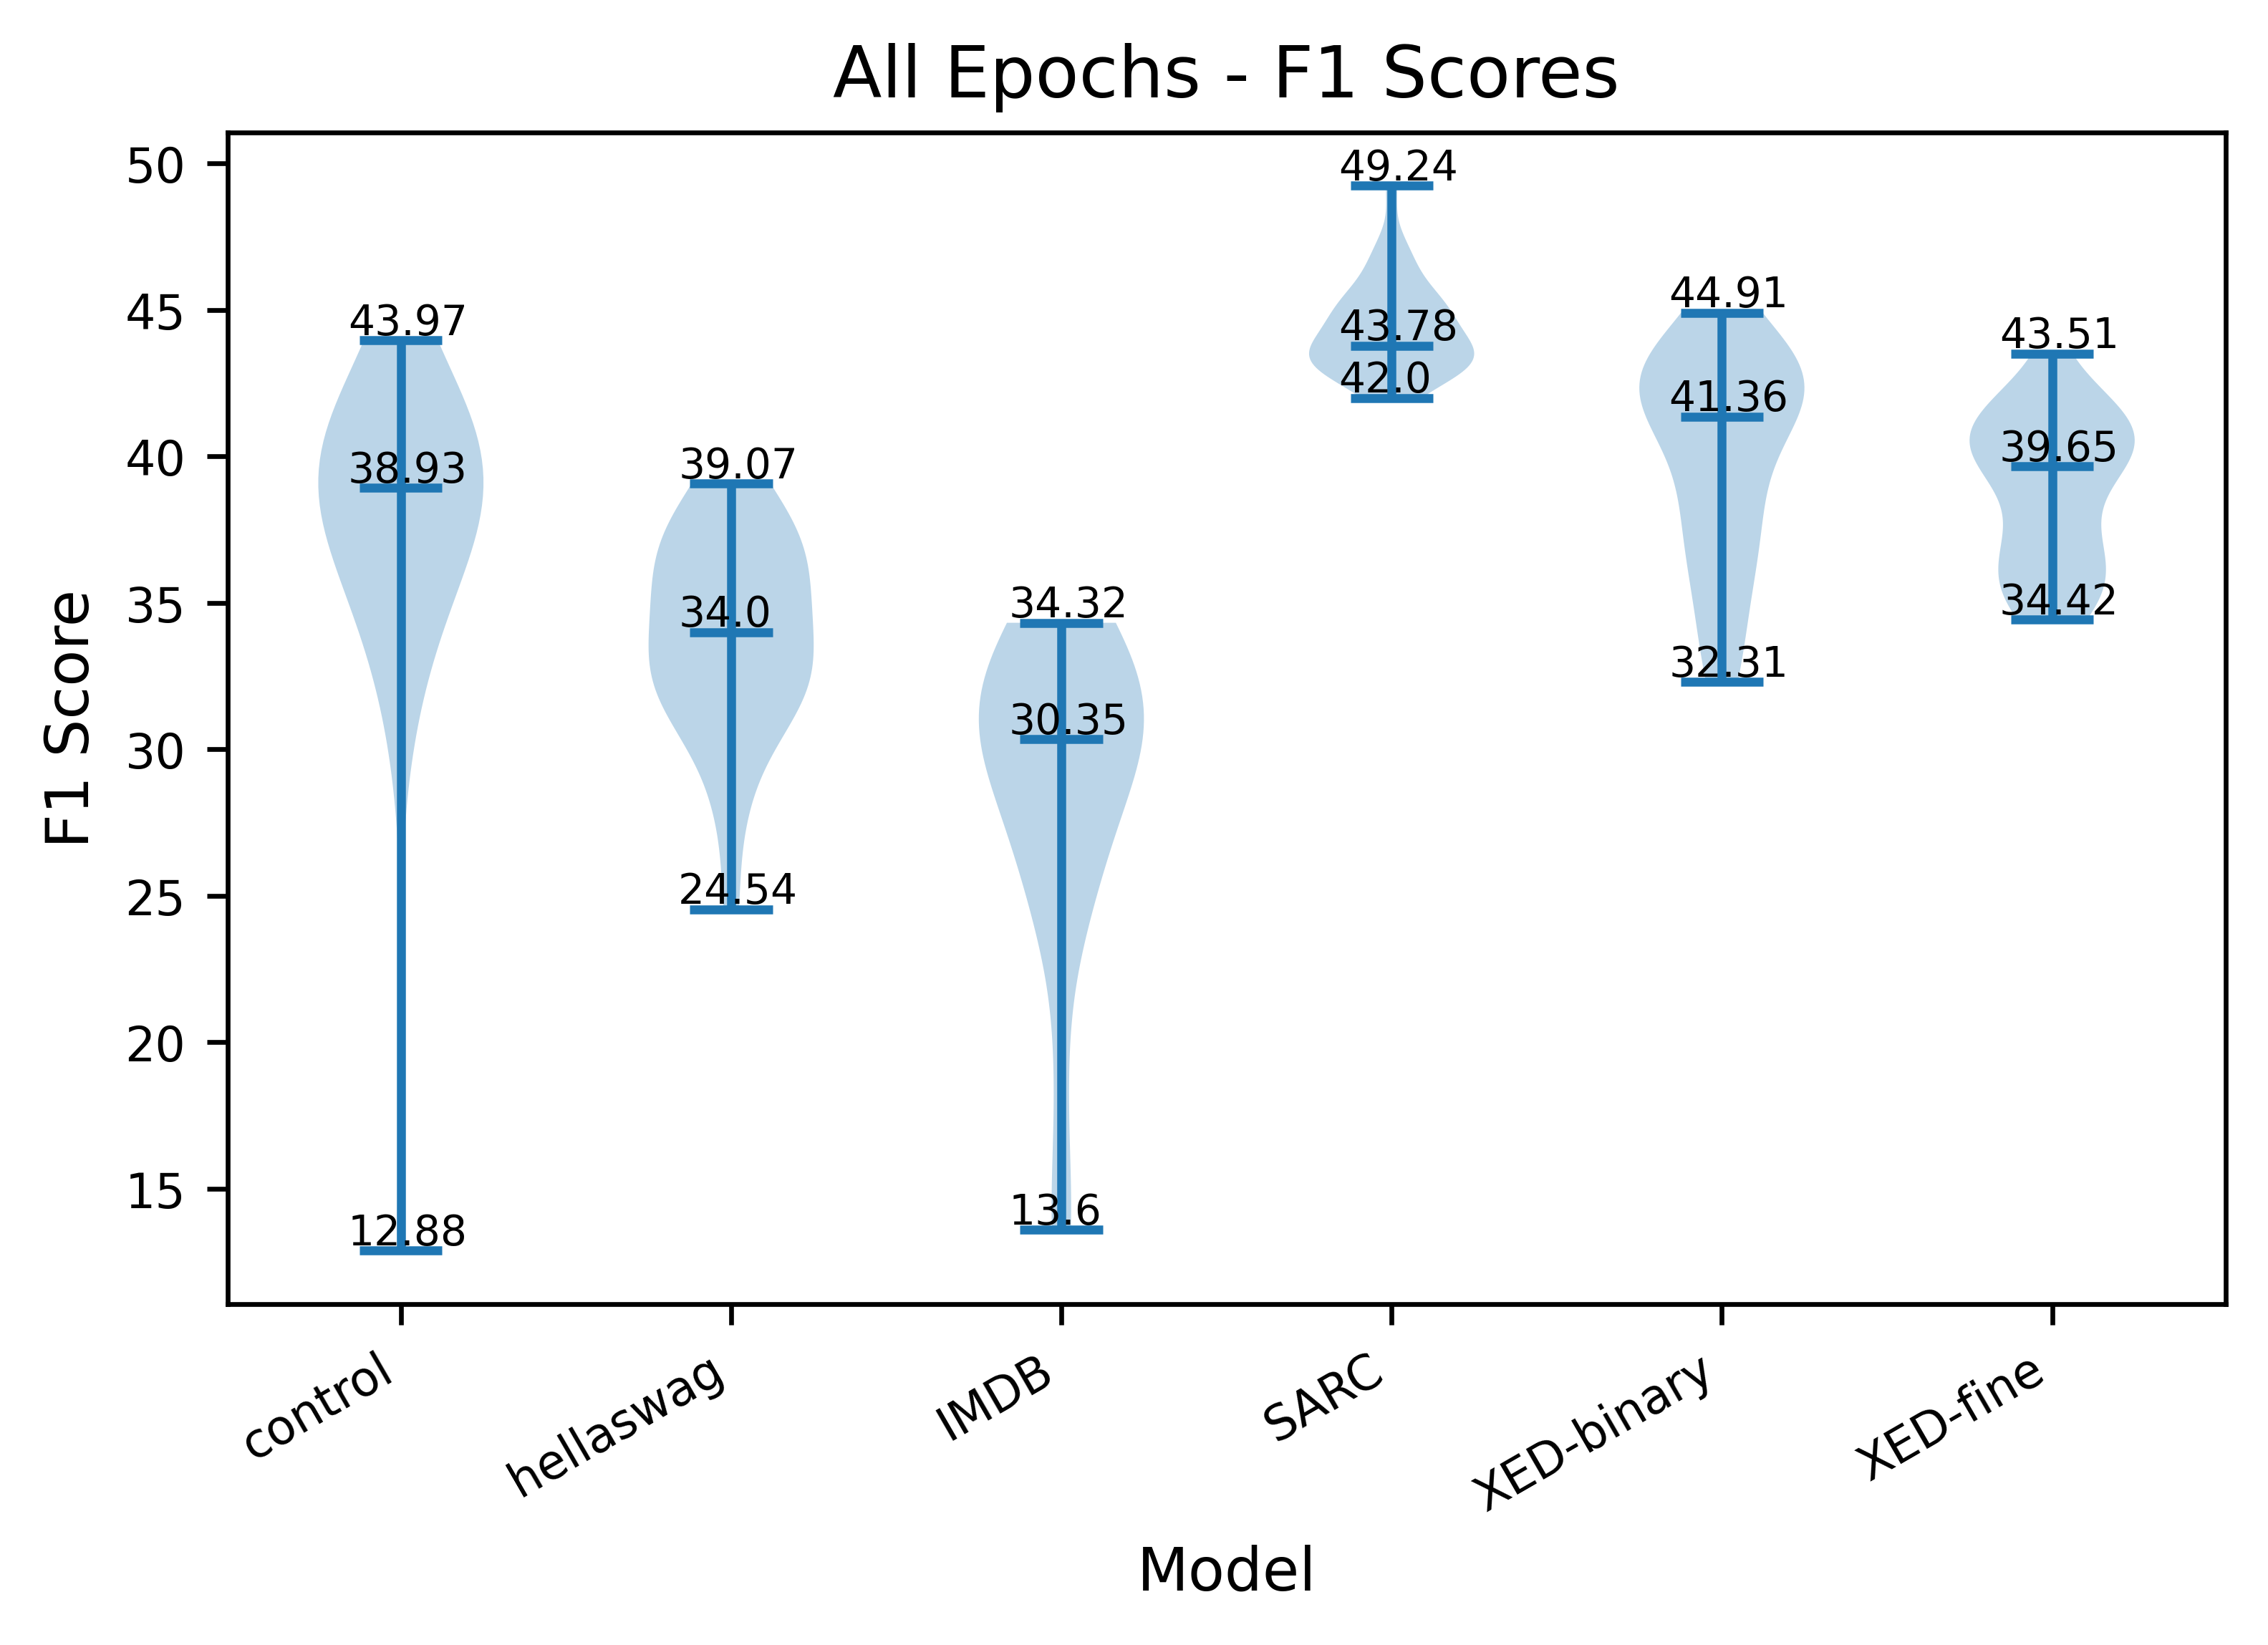

In [8]:
plot_viola(results_df, 'test_f1', 'All Epochs - F1 Scores', 'Model', "F1 Score")

### Accuracy Scores

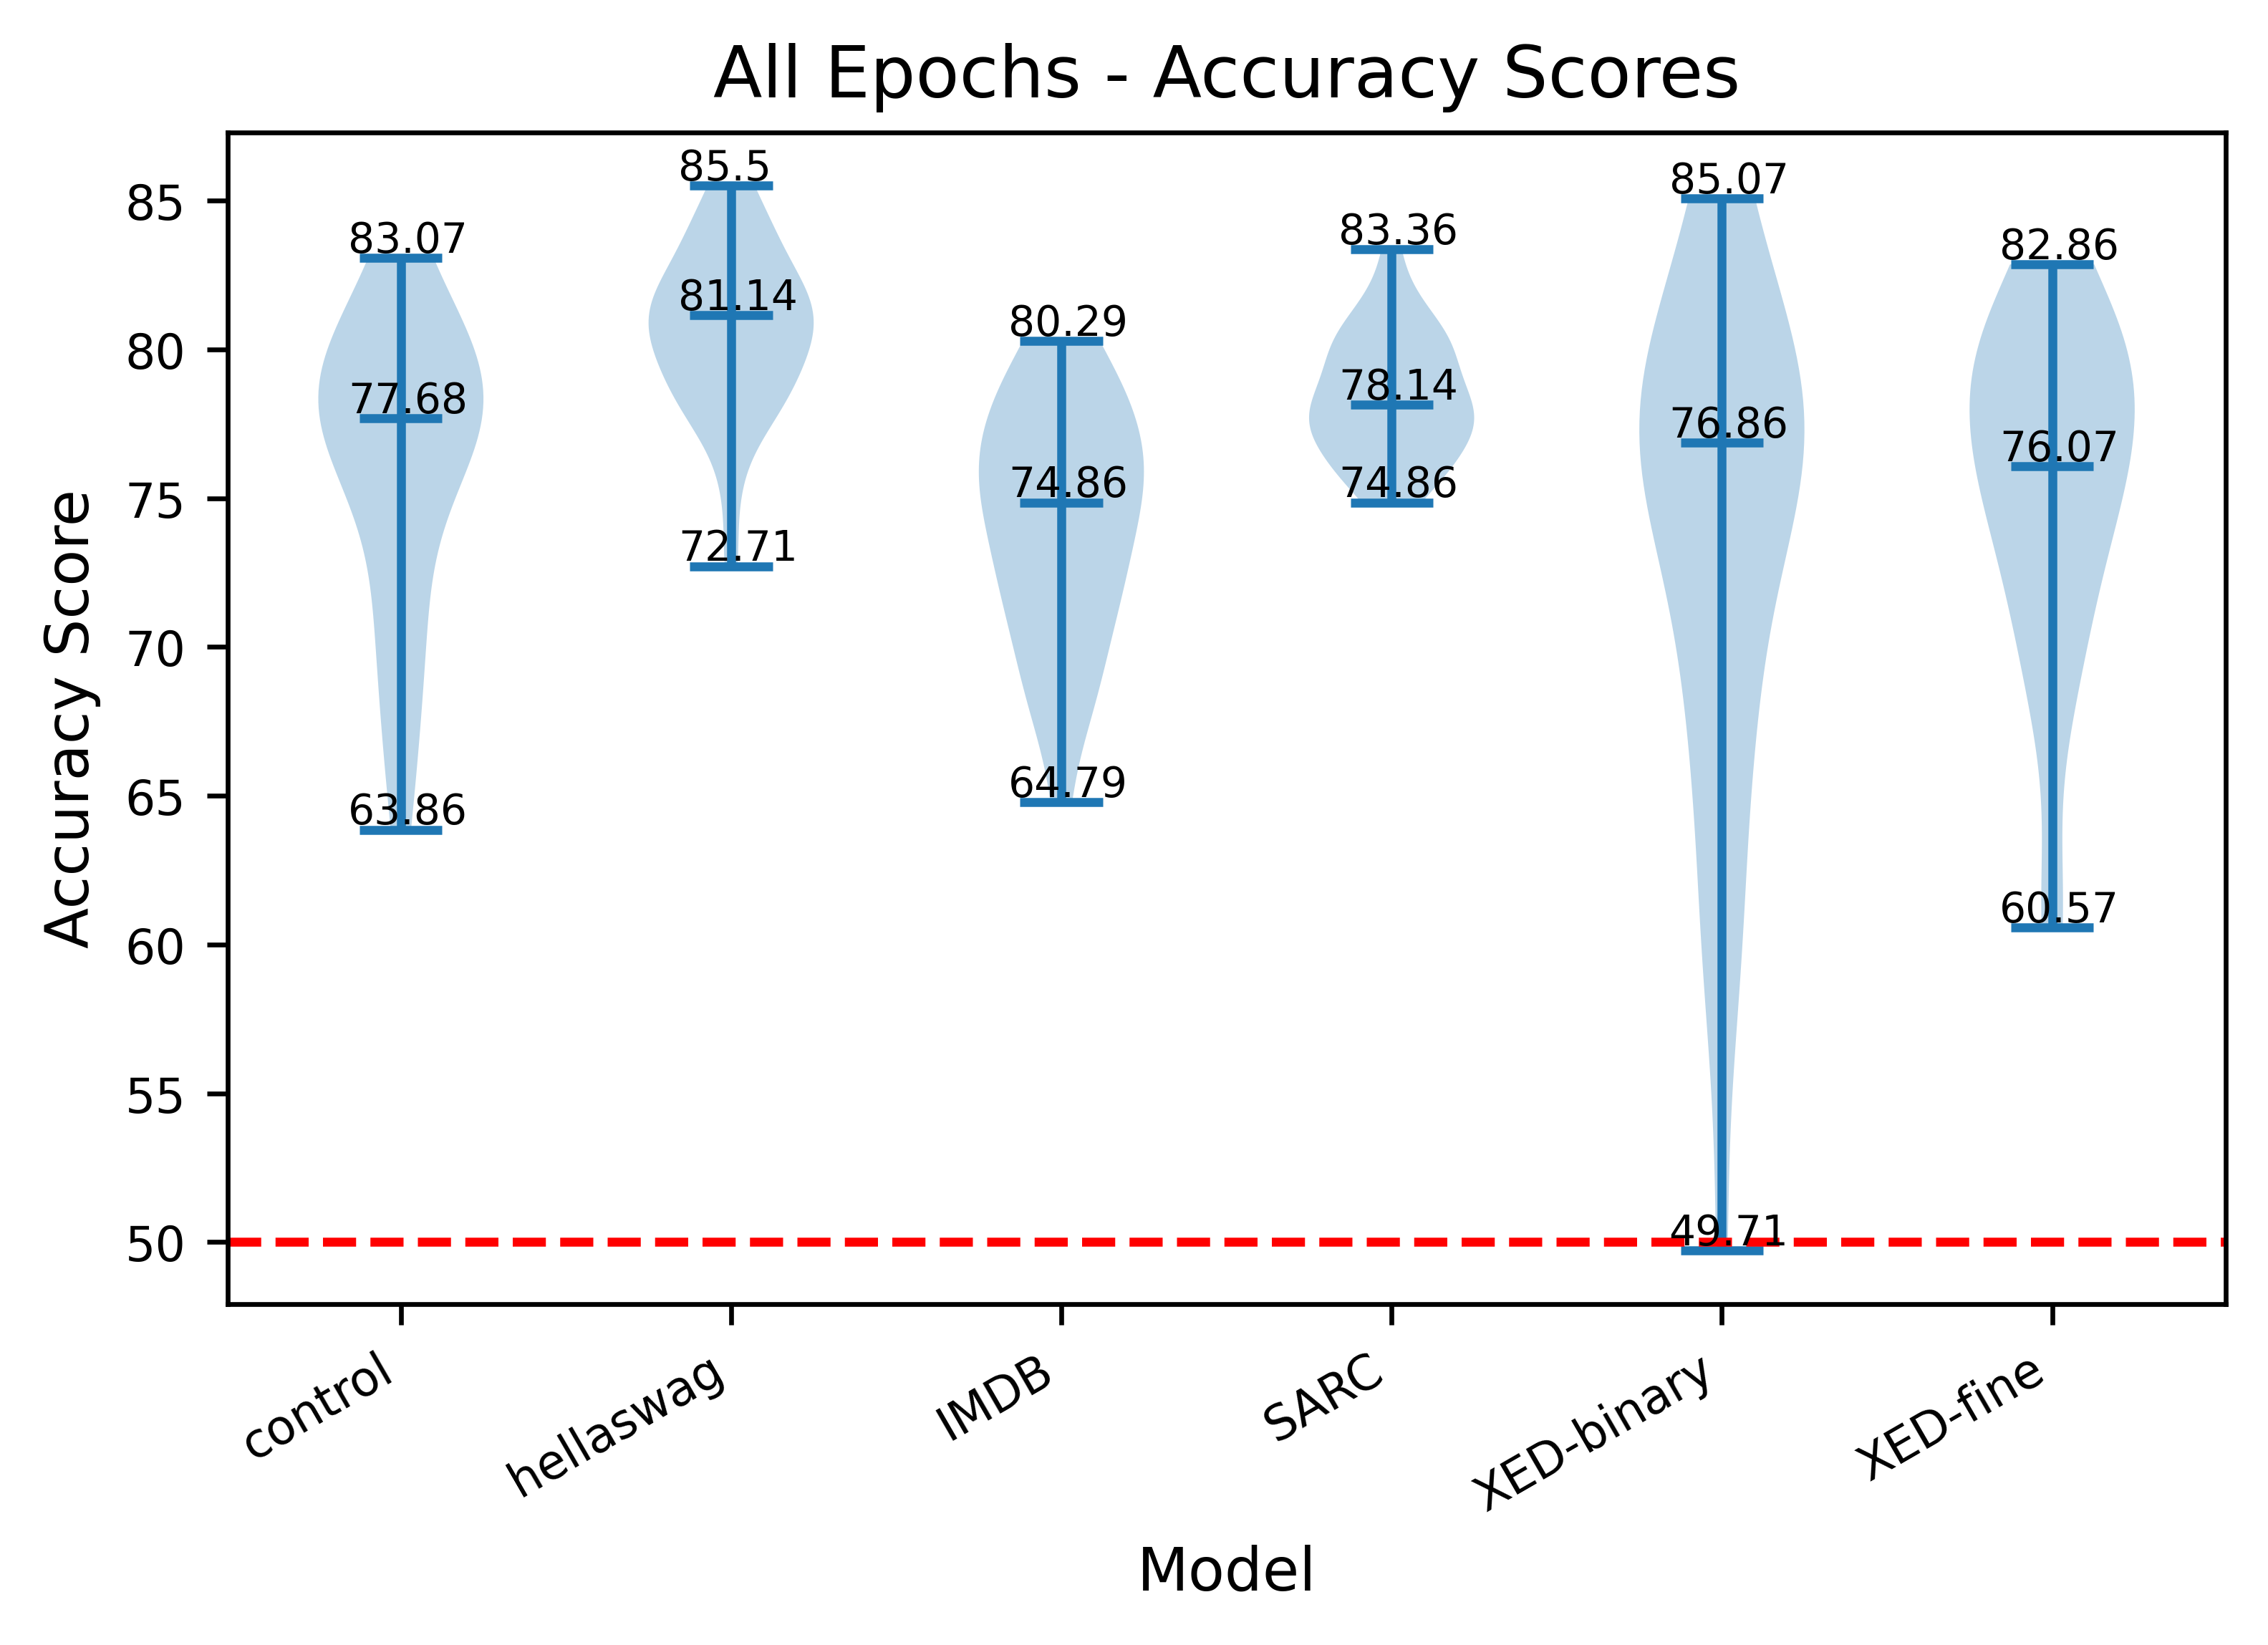

In [9]:
plot_viola(results_df, 'test_accuracy', 'All Epochs - Accuracy Scores', 'Model', "Accuracy Score", display_hline=True)

## Plot Best Epochs by F1

In [10]:
# get only best epochs from each model
idx = results_df.groupby(['model_name'])['test_f1'].transform(max) == results_df['test_f1']
best_f1_df = results_df[idx]


best_f1_df = best_f1_df.reset_index(drop=True)
best_f1_df

model_name      model_epoch  test_accuracy  \
0                   iSarcasm_control_02  E10_A0.91_F0.91      82.142857   
1                   iSarcasm_control_03  E10_A0.92_F0.91      79.214286   
2                   iSarcasm_control_01  E10_A0.89_F0.89      77.428571   
3    target-iSarcasm_inter-hellaswag_01  E02_A0.86_F0.86      75.428571   
4    target-iSarcasm_inter-hellaswag_02    E09_A0.9_F0.9      79.500000   
5    target-iSarcasm_inter-hellaswag_03   E04_A0.91_F0.9      80.071429   
6         target-iSarcasm_inter-IMDB_01  E08_A0.92_F0.92      79.285714   
7         target-iSarcasm_inter-IMDB_03    E08_A0.9_F0.9      74.571429   
8         target-iSarcasm_inter-IMDB_02  E07_A0.83_F0.84      64.785714   
9         target-iSarcasm_inter-SARC_03    E03_A0.9_F0.9      79.642857   
10        target-iSarcasm_inter-SARC_02  E04_A0.89_F0.88      80.000000   
11        target-iSarcasm_inter-SARC_01  E07_A0.92_F0.91      83.357143   
12  target-iSarcasm_inter-XED-binary_01  E04_A0.92_F0.91      82.142857   
13  target-iSarcasm_inter-XED-binary_02    E08_A0.9_F0.9      77.214286   
14  target-iSarcasm_inter-XED-binary_03  E05_A0.91_F0.91      79.571429   
15    target-iSarcasm_inter-XED-fine_01  E09_A0.92_F0.91      79.785714   
16    target-iSarcasm_inter-XED-fine_02  E10_A0.91_F0.91      80.214286   
17    target-iSarcasm_inter-XED-fine_03  E06_A0.89_F0.89      76.928571   

      test_f1                                        predictions  \
0   43.181818  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1   39.248434  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...   
2   43.971631  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...   
3   37.226277  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
4   39.065817  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5   38.681319  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6   33.486239  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
7   34.317343  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
8   34.178905  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
9   45.086705  [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...   
10  46.969697  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...   
11  49.237473  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...   
12  43.181818  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
13  44.905009  [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...   
14  43.027888  [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
15  43.512974  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
16  41.928721  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...   
17  41.801802  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...   

                           model_cat model_display_name  
0                   iSarcasm_control            control  
1                   iSarcasm_control            control  
2                   iSarcasm_control            control  
3    target-iSarcasm_inter-hellaswag          hellaswag  
4    target-iSarcasm_inter-hellaswag          hellaswag  
5    target-iSarcasm_inter-hellaswag          hellaswag  
6         target-iSarcasm_inter-IMDB               IMDB  
7         target-iSarcasm_inter-IMDB               IMDB  
8         target-iSarcasm_inter-IMDB               IMDB  
9         target-iSarcasm_inter-SARC               SARC  
10        target-iSarcasm_inter-SARC               SARC  
11        target-iSarcasm_inter-SARC               SARC  
12  target-iSarcasm_inter-XED-binary         XED-binary  
13  target-iSarcasm_inter-XED-binary         XED-binary  
14  target-iSarcasm_inter-XED-binary         XED-binary  
15    target-iSarcasm_inter-XED-fine           XED-fine  
16    target-iSarcasm_inter-XED-fine           XED-fine  
17    target-iSarcasm_inter-XED-fine           XED-fine

/Users/jarradjinx/Library/Mobile Documents/com~apple~CloudDocs/EDU_leeds/LD_research/LD_ITESD/results/utils_eda.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


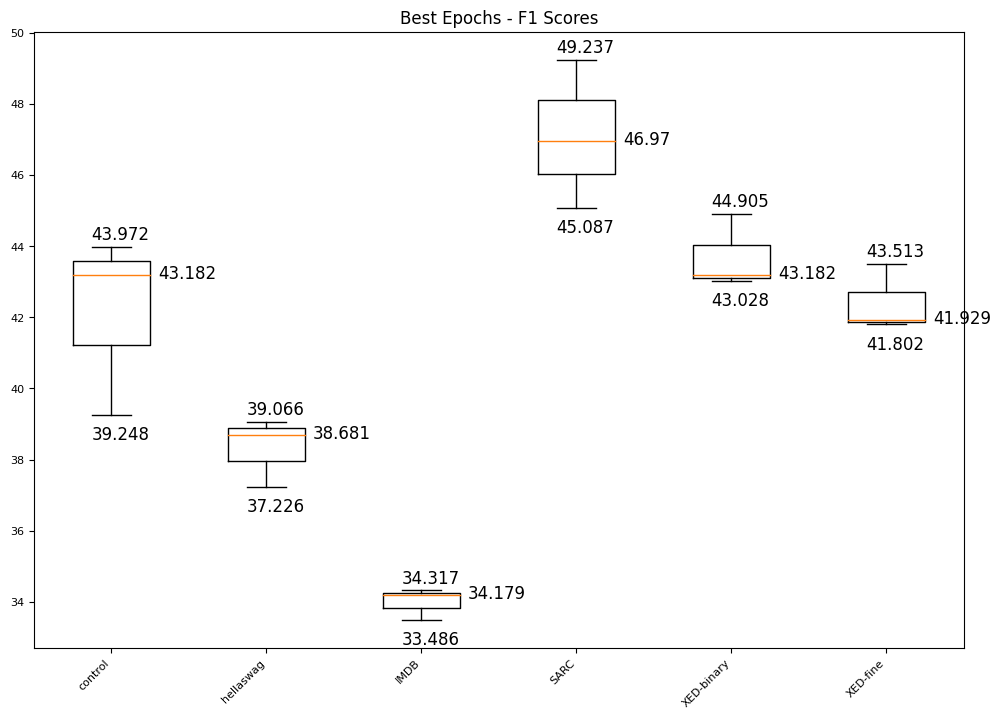

In [11]:
plot_box(best_f1_df, 'test_f1', 'Best Epochs - F1 Scores')

# BIG NOTE, THIS IS CURRENTLY BEST EPOCH BY F1, MAYBE DESPLAY BEST EPOCH BY ACC?

/Users/jarradjinx/Library/Mobile Documents/com~apple~CloudDocs/EDU_leeds/LD_research/LD_ITESD/results/utils_eda.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


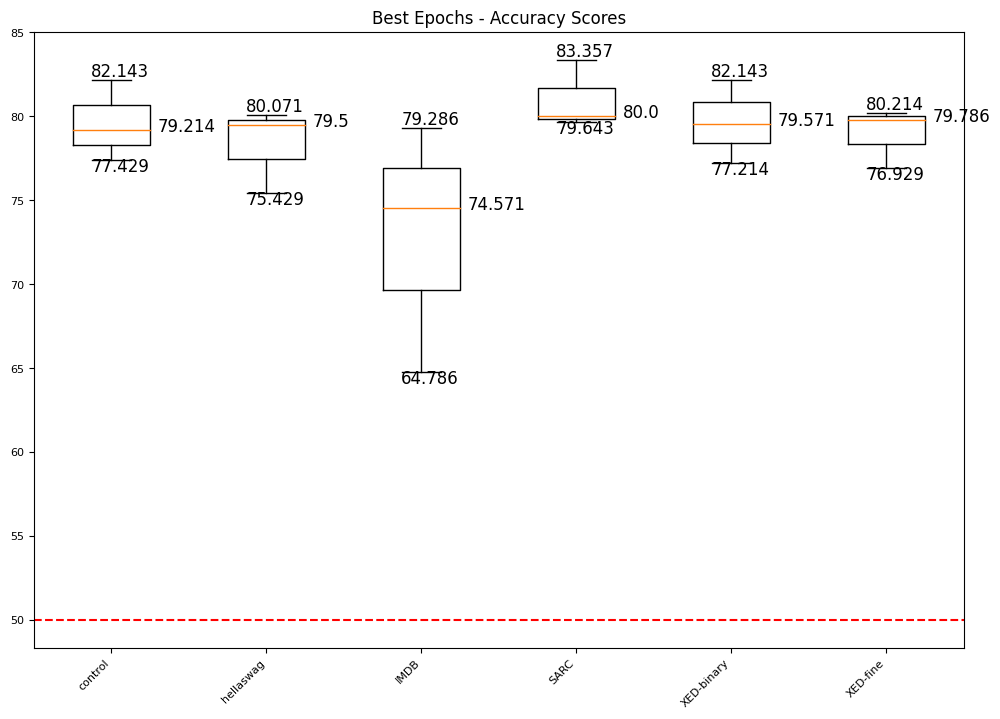

In [12]:
plot_box(best_f1_df, 'test_accuracy', 'Best Epochs - Accuracy Scores', display_hline=True)

## Plot Best Epochs by Accuracy

In [13]:
# get only best epochs from each model
idx = results_df.groupby(['model_name'])['test_accuracy'].transform(max) == results_df['test_accuracy']
best_acc_df = results_df[idx]


best_acc_df = best_acc_df.reset_index(drop=True)
best_acc_df

model_name      model_epoch  test_accuracy  \
0                   iSarcasm_control_03  E05_A0.92_F0.91      80.071429   
1                   iSarcasm_control_01  E05_A0.93_F0.93      82.285714   
2                   iSarcasm_control_02  E01_A0.65_F0.52      83.071429   
3    target-iSarcasm_inter-hellaswag_01  E09_A0.95_F0.95      85.500000   
4    target-iSarcasm_inter-hellaswag_02  E08_A0.93_F0.93      84.357143   
5    target-iSarcasm_inter-hellaswag_03  E05_A0.94_F0.94      85.000000   
6         target-iSarcasm_inter-IMDB_01  E08_A0.92_F0.92      79.285714   
7         target-iSarcasm_inter-IMDB_02  E10_A0.93_F0.92      80.285714   
8         target-iSarcasm_inter-IMDB_03  E03_A0.85_F0.83      79.357143   
9         target-iSarcasm_inter-SARC_03    E04_A0.9_F0.9      80.214286   
10        target-iSarcasm_inter-SARC_01  E07_A0.92_F0.91      83.357143   
11        target-iSarcasm_inter-SARC_02    E05_A0.9_F0.9      80.642857   
12  target-iSarcasm_inter-XED-binary_01  E07_A0.93_F0.93      85.071429   
13  target-iSarcasm_inter-XED-binary_02   E04_A0.91_F0.9      83.500000   
14  target-iSarcasm_inter-XED-binary_03  E05_A0.91_F0.91      79.571429   
15    target-iSarcasm_inter-XED-fine_01  E10_A0.94_F0.93      82.857143   
16    target-iSarcasm_inter-XED-fine_02  E10_A0.91_F0.91      80.214286   
17    target-iSarcasm_inter-XED-fine_03  E10_A0.91_F0.91      81.000000   

      test_f1                                        predictions  \
0   33.729216  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1   40.384615  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   30.088496  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
3   24.535316  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4   33.434650  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5   27.586207  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6   33.486239  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
7   30.303030  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
8   25.322997  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
9   43.813387  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...   
10  49.237473  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...   
11  46.548323  [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...   
12  42.424242  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
13  42.679901  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
14  43.027888  [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
15  40.298507  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
16  41.928721  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...   
17  35.748792  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...   

                           model_cat model_display_name  
0                   iSarcasm_control            control  
1                   iSarcasm_control            control  
2                   iSarcasm_control            control  
3    target-iSarcasm_inter-hellaswag          hellaswag  
4    target-iSarcasm_inter-hellaswag          hellaswag  
5    target-iSarcasm_inter-hellaswag          hellaswag  
6         target-iSarcasm_inter-IMDB               IMDB  
7         target-iSarcasm_inter-IMDB               IMDB  
8         target-iSarcasm_inter-IMDB               IMDB  
9         target-iSarcasm_inter-SARC               SARC  
10        target-iSarcasm_inter-SARC               SARC  
11        target-iSarcasm_inter-SARC               SARC  
12  target-iSarcasm_inter-XED-binary         XED-binary  
13  target-iSarcasm_inter-XED-binary         XED-binary  
14  target-iSarcasm_inter-XED-binary         XED-binary  
15    target-iSarcasm_inter-XED-fine           XED-fine  
16    target-iSarcasm_inter-XED-fine           XED-fine  
17    target-iSarcasm_inter-XED-fine           XED-fine

In [ ]:
plot_box(best_acc_df, 'test_f1', 'Best Epochs by Accuracy - F1 Scores')

In [ ]:
plot_box(best_acc_df, 'test_accuracy', 'Best Epochs by Accuracy - Accuracy Scores', display_hline=True)

## Prediction Similarities

The following heatmap compares each model's predictions with the others and assigns a score on a 0-1 scale, with 1 representing predictions that match each other perfectly.  

### Prep Data 

In [14]:
# TODO best df is results_df with all but the best epochs per model filtered out.

idx = results_df.groupby(['model_name'])['test_f1'].transform(max) == results_df['test_f1']

best_df = results_df[idx]

best_df.head()

model_name      model_epoch  test_accuracy  \
19                  iSarcasm_control_02  E10_A0.91_F0.91      82.142857   
29                  iSarcasm_control_03  E10_A0.92_F0.91      79.214286   
9                   iSarcasm_control_01  E10_A0.89_F0.89      77.428571   
151  target-iSarcasm_inter-hellaswag_01  E02_A0.86_F0.86      75.428571   
168  target-iSarcasm_inter-hellaswag_02    E09_A0.9_F0.9      79.500000   

       test_f1                                        predictions  \
19   43.181818  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
29   39.248434  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...   
9    43.971631  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...   
151  37.226277  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
168  39.065817  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                           model_cat model_display_name  
19                  iSarcasm_control            control  
29                  iSarcasm_control            control  
9                   iSarcasm_control            control  
151  target-iSarcasm_inter-hellaswag          hellaswag  
168  target-iSarcasm_inter-hellaswag          hellaswag

In [15]:

rows = []

for index_1, row_1 in best_df.iterrows():
    values = []
    values.append(row_1['model_name'])
    # print(index_1, row_1['model_name'], row_1['test_f1'])

    for index_2, row_2 in best_df.iterrows():
        values.append(accuracy_score(row_1['predictions'], row_2['predictions']))
        # print("\t", index_2, row_2['model_name'], row_2['test_f1'])
    rows.append(values)

In [16]:
rows[0][1:]

[1.0,
 0.8921428571428571,
 0.87,
 0.8114285714285714,
 0.8435714285714285,
 0.8464285714285714,
 0.8457142857142858,
 0.7828571428571428,
 0.7007142857142857,
 0.8235714285714286,
 0.8242857142857143,
 0.8478571428571429,
 0.8542857142857143,
 0.8135714285714286,
 0.8371428571428572,
 0.8478571428571429,
 0.855,
 0.8307142857142857]

In [17]:
models = best_df['model_name'].values

my_index = pd.MultiIndex(levels=[[]],
                         codes=[[]],
                         names=[u'model'])
my_index

my_columns = models 
heat_df = pd.DataFrame(index=my_index, columns=my_columns)

# add data
for i in rows:
    heat_df.loc[(i[0]),:] = i[1:]
# heat_df.loc[('target-iSarcasm_inter-XED-binary_02'),:] = rows[[1:]]

heat_df

/var/folders/99/shh1qrbd2p7bf1bz7xc2lyz00000gn/T/ipykernel_94640/2449882067.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  heat_df.loc[(i[0]),:] = i[1:]


iSarcasm_control_02  iSarcasm_control_03  \
model                                                                           
iSarcasm_control_02                             1.000000             0.892143   
iSarcasm_control_03                             0.892143             1.000000   
iSarcasm_control_01                             0.870000             0.867857   
target-iSarcasm_inter-hellaswag_01              0.811429             0.796429   
target-iSarcasm_inter-hellaswag_02              0.843571             0.818571   
target-iSarcasm_inter-hellaswag_03              0.846429             0.830000   
target-iSarcasm_inter-IMDB_01                   0.845714             0.837857   
target-iSarcasm_inter-IMDB_03                   0.782857             0.762143   
target-iSarcasm_inter-IMDB_02                   0.700714             0.715714   
target-iSarcasm_inter-SARC_03                   0.823571             0.818571   
target-iSarcasm_inter-SARC_02                   0.824286             0.813571   
target-iSarcasm_inter-SARC_01                   0.847857             0.845714   
target-iSarcasm_inter-XED-binary_01             0.854286             0.833571   
target-iSarcasm_inter-XED-binary_02             0.813571             0.808571   
target-iSarcasm_inter-XED-binary_03             0.837143             0.829286   
target-iSarcasm_inter-XED-fine_01               0.847857             0.847143   
target-iSarcasm_inter-XED-fine_02               0.855000             0.851429   
target-iSarcasm_inter-XED-fine_03               0.830714             0.827143   

                                     iSarcasm_control_01  \
model                                                      
iSarcasm_control_02                             0.870000   
iSarcasm_control_03                             0.867857   
iSarcasm_control_01                             1.000000   
target-iSarcasm_inter-hellaswag_01              0.792857   
target-iSarcasm_inter-hellaswag_02              0.796429   
target-iSarcasm_inter-hellaswag_03              0.805000   
target-iSarcasm_inter-IMDB_01                   0.802857   
target-iSarcasm_inter-IMDB_03                   0.764286   
target-iSarcasm_inter-IMDB_02                   0.722143   
target-iSarcasm_inter-SARC_03                   0.805000   
target-iSarcasm_inter-SARC_02                   0.802857   
target-iSarcasm_inter-SARC_01                   0.806429   
target-iSarcasm_inter-XED-binary_01             0.817143   
target-iSarcasm_inter-XED-binary_02             0.830714   
target-iSarcasm_inter-XED-binary_03             0.831429   
target-iSarcasm_inter-XED-fine_01               0.837857   
target-iSarcasm_inter-XED-fine_02               0.836429   
target-iSarcasm_inter-XED-fine_03               0.832143   

                                     target-iSarcasm_inter-hellaswag_01  \
model                                                                     
iSarcasm_control_02                                            0.811429   
iSarcasm_control_03                                            0.796429   
iSarcasm_control_01                                            0.792857   
target-iSarcasm_inter-hellaswag_01                             1.000000   
target-iSarcasm_inter-hellaswag_02                             0.855000   
target-iSarcasm_inter-hellaswag_03                             0.866429   
target-iSarcasm_inter-IMDB_01                                  0.778571   
target-iSarcasm_inter-IMDB_03                                  0.742857   
target-iSarcasm_inter-IMDB_02                                  0.686429   
target-iSarcasm_inter-SARC_03                                  0.762143   
target-iSarcasm_inter-SARC_02                                  0.750000   
target-iSarcasm_inter-SARC_01                                  0.767857   
target-iSarcasm_inter-XED-binary_01                            0.775714   
target-iSarcasm_inter-XED-binary_02                            0.747857   
target-iSarcasm

### Plot Heatmap

In [18]:
heat_df = heat_df.sort_values(by = 'model')
heat_df = heat_df[sorted(heat_df)]
heat_df

iSarcasm_control_01  iSarcasm_control_02  \
model                                                                           
iSarcasm_control_01                             1.000000             0.870000   
iSarcasm_control_02                             0.870000             1.000000   
iSarcasm_control_03                             0.867857             0.892143   
target-iSarcasm_inter-IMDB_01                   0.802857             0.845714   
target-iSarcasm_inter-IMDB_02                   0.722143             0.700714   
target-iSarcasm_inter-IMDB_03                   0.764286             0.782857   
target-iSarcasm_inter-SARC_01                   0.806429             0.847857   
target-iSarcasm_inter-SARC_02                   0.802857             0.824286   
target-iSarcasm_inter-SARC_03                   0.805000             0.823571   
target-iSarcasm_inter-XED-binary_01             0.817143             0.854286   
target-iSarcasm_inter-XED-binary_02             0.830714             0.813571   
target-iSarcasm_inter-XED-binary_03             0.831429             0.837143   
target-iSarcasm_inter-XED-fine_01               0.837857             0.847857   
target-iSarcasm_inter-XED-fine_02               0.836429             0.855000   
target-iSarcasm_inter-XED-fine_03               0.832143             0.830714   
target-iSarcasm_inter-hellaswag_01              0.792857             0.811429   
target-iSarcasm_inter-hellaswag_02              0.796429             0.843571   
target-iSarcasm_inter-hellaswag_03              0.805000             0.846429   

                                     iSarcasm_control_03  \
model                                                      
iSarcasm_control_01                             0.867857   
iSarcasm_control_02                             0.892143   
iSarcasm_control_03                             1.000000   
target-iSarcasm_inter-IMDB_01                   0.837857   
target-iSarcasm_inter-IMDB_02                   0.715714   
target-iSarcasm_inter-IMDB_03                   0.762143   
target-iSarcasm_inter-SARC_01                   0.845714   
target-iSarcasm_inter-SARC_02                   0.813571   
target-iSarcasm_inter-SARC_03                   0.818571   
target-iSarcasm_inter-XED-binary_01             0.833571   
target-iSarcasm_inter-XED-binary_02             0.808571   
target-iSarcasm_inter-XED-binary_03             0.829286   
target-iSarcasm_inter-XED-fine_01               0.847143   
target-iSarcasm_inter-XED-fine_02               0.851429   
target-iSarcasm_inter-XED-fine_03               0.827143   
target-iSarcasm_inter-hellaswag_01              0.796429   
target-iSarcasm_inter-hellaswag_02              0.818571   
target-iSarcasm_inter-hellaswag_03              0.830000   

                                     target-iSarcasm_inter-IMDB_01  \
model                                                                
iSarcasm_control_01                                       0.802857   
iSarcasm_control_02                                       0.845714   
iSarcasm_control_03                                       0.837857   
target-iSarcasm_inter-IMDB_01                             1.000000   
target-iSarcasm_inter-IMDB_02                             0.719286   
target-iSarcasm_inter-IMDB_03                             0.824286   
target-iSarcasm_inter-SARC_01                             0.805000   
target-iSarcasm_inter-SARC_02                             0.780000   
target-iSarcasm_inter-SARC_03                             0.779286   
target-iSarcasm_inter-XED-binary_01                       0.802857   
target-iSarcasm_inter-XED-binary_02                       0.763571   
target-iSarcasm_inter-XED-binary_03                       0.788571   
target-iSarcasm_inter-XED-fine_01                         0.806429   
target-iSarcasm_inter-XED-fine_02                         0.827857   
target-iSarcasm_inter-XED-fine_03                         0.792143   
target-iSarcasm_inter-hel

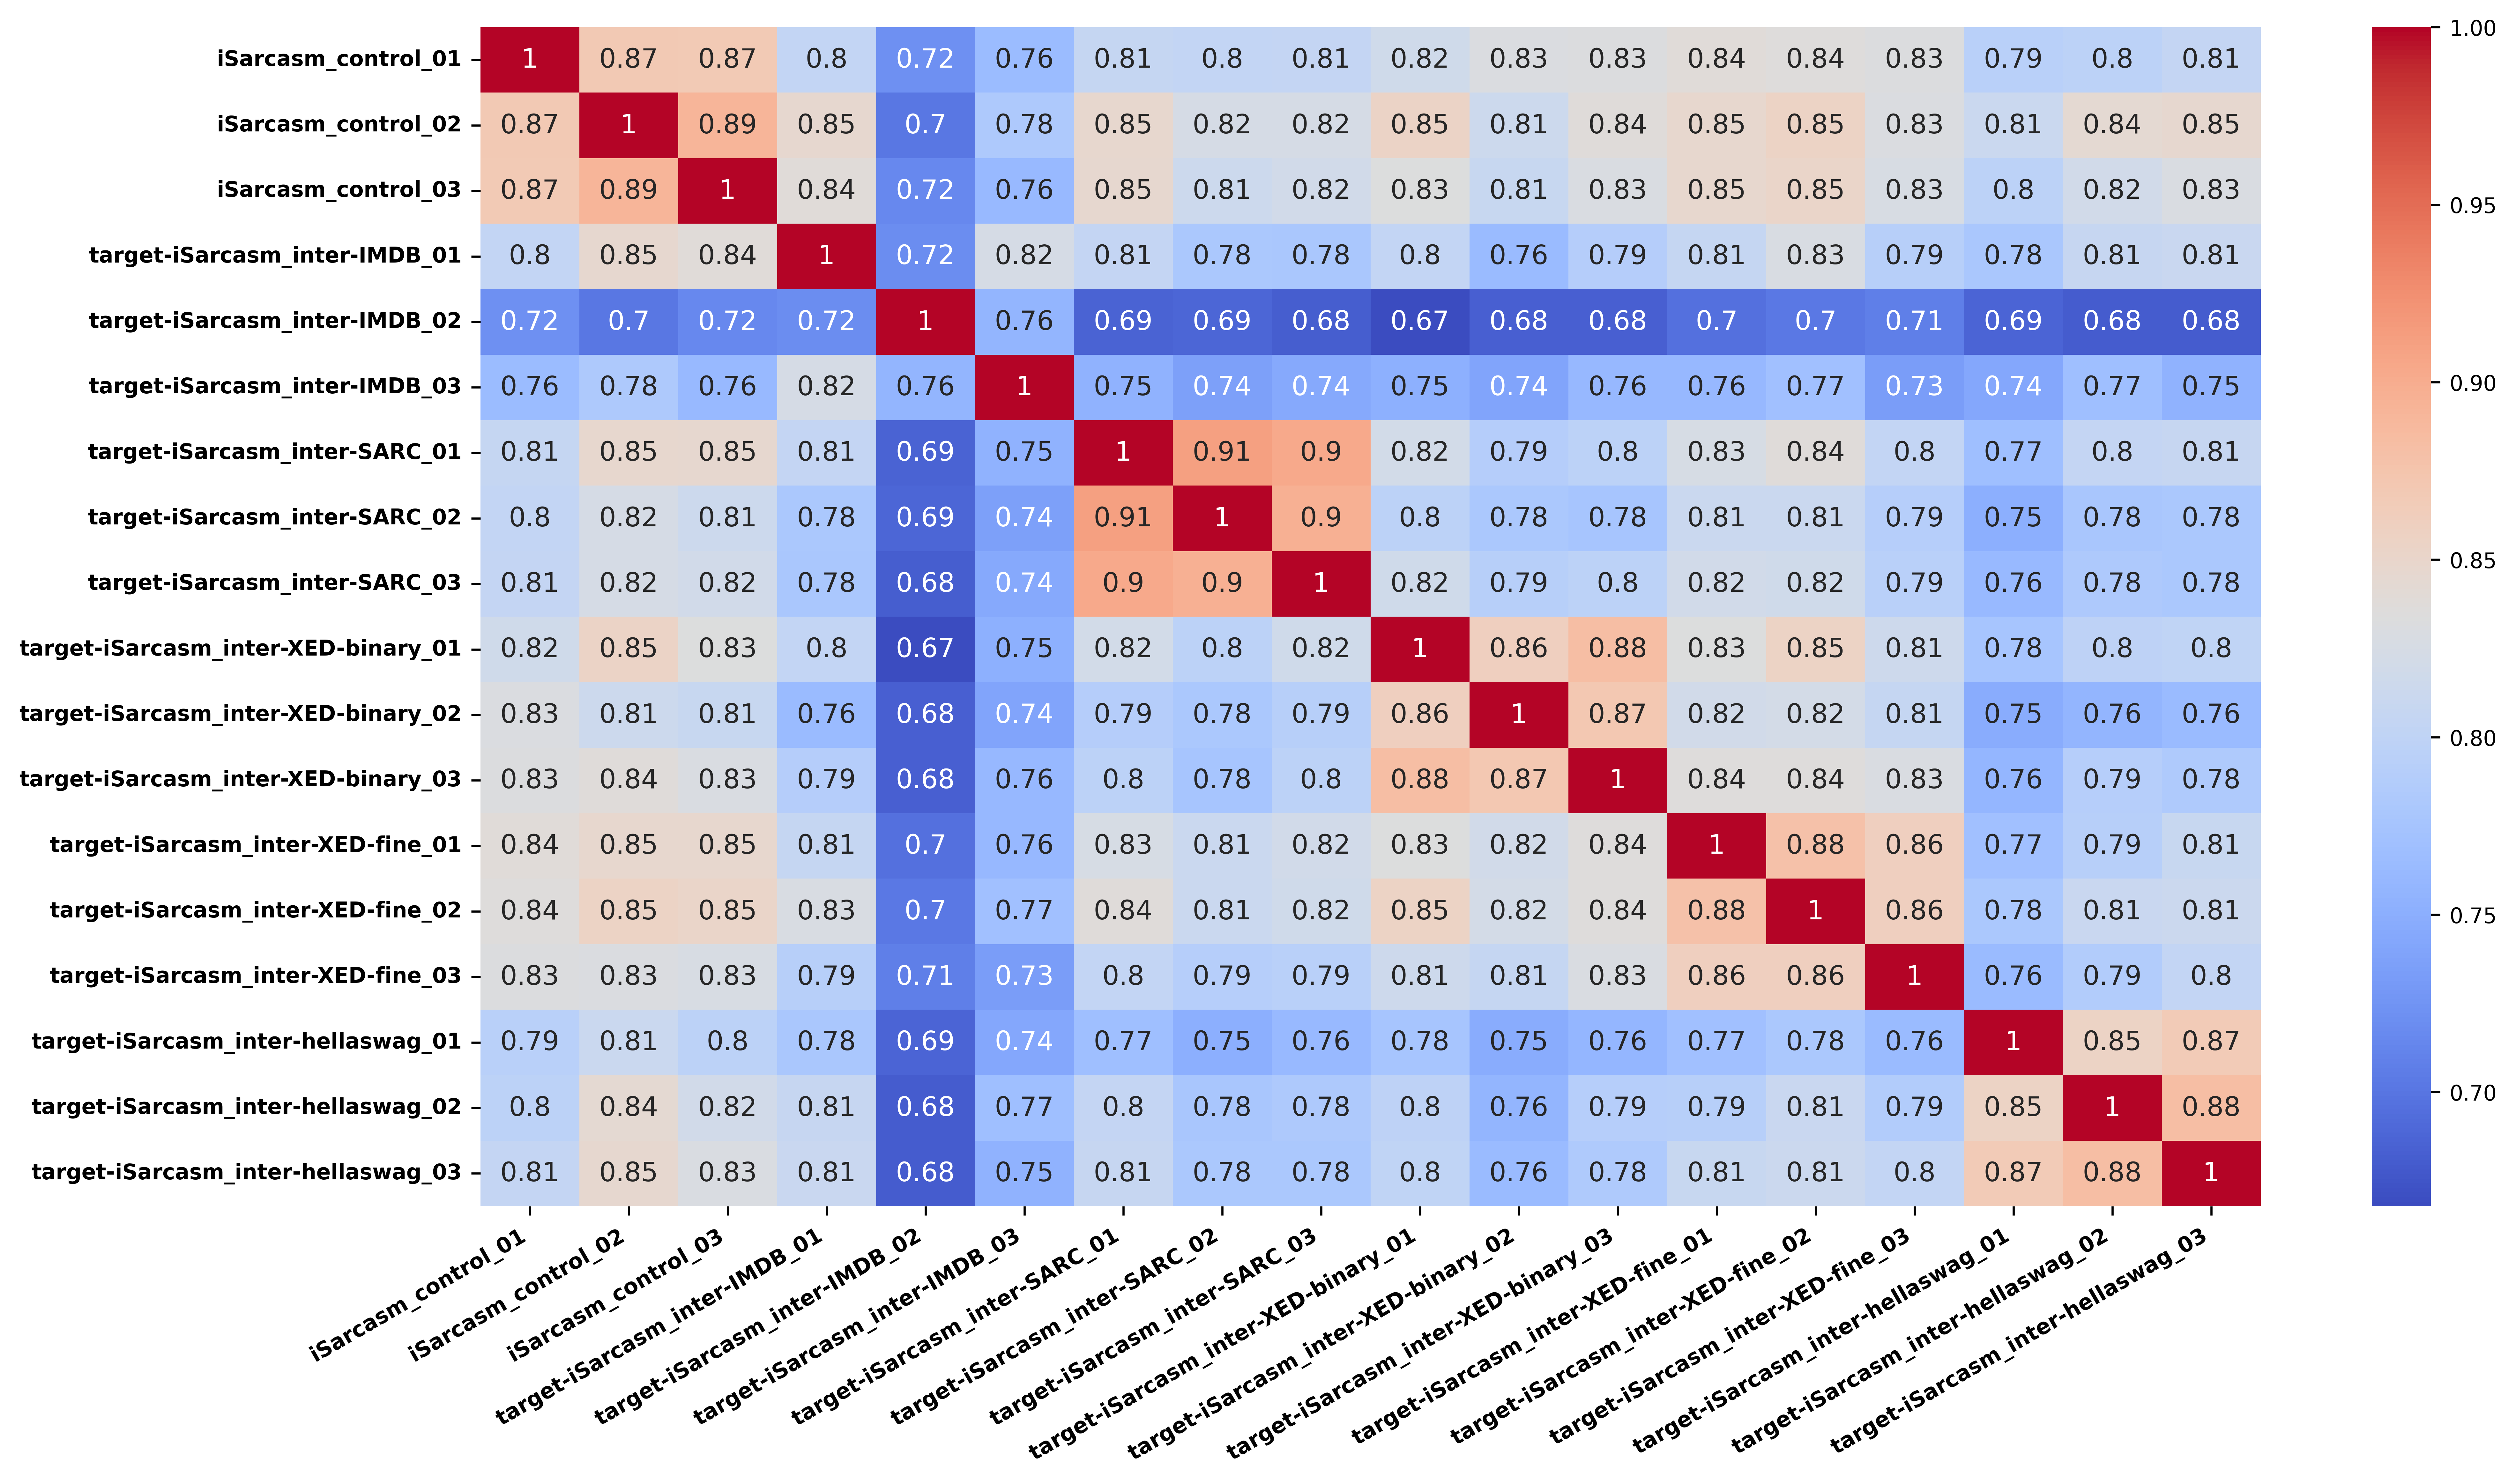

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 8), dpi=600)
# mask = np.triu(np.ones_like(heat_df))
# sns.heatmap(heat_df, annot=True, mask=mask)
sns.heatmap(heat_df, annot=True, cmap='coolwarm')
plt.yticks(rotation=0, weight='bold') 
plt.xticks(rotation=30, horizontalalignment='right', weight='bold')

plt.xlabel("", fontsize=10)
plt.ylabel("", fontsize=10)
    
# add title
# plt.title("Model Prediction Similarities", fontsize=14)
plt.show()